In [ ]:
import csv
import statistics
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spreadspoke_scores.csv to spreadspoke_scores.csv


In [ ]:
def csv_lines(file):
    infile = open(file)
    rows = []
    for row in csv.reader(infile):
      rows.append(row)
    rows.pop(0)
    return rows

In [ ]:
def get_spreads(data):
  reg_szn_spreads = []
  playoff_spreads = []
  for row in data:
    spread = row[9]
    playoff_or_not = row[3]
    # In the data, 'FALSE' denotes a regular season game
    if playoff_or_not == 'FALSE':
      reg_szn_spreads.append(spread)
    else:
      playoff_spreads.append(spread)

  return reg_szn_spreads, playoff_spreads



In [ ]:
def count_null_spreads(spread_lst):
  # In order to do math and further computations with the data
  # we need to count how many empty values for spread are in the data
  null_count = 0
  for i in spread_lst:
    if i == '':
      null_count += 1
  return null_count

In [ ]:
def clean_spreads(spread_lst, null_count):
  # Once we have counted all the non-existent spreads, we need to remove them from the data
  # We return only the numerical spread values as a list of strings
  for i in range(null_count):
    spread_lst.remove('')
  return spread_lst

In [ ]:
def convert_to_float(spread_lst):
  # In order to do computations with our spreads, they must be numbers
  # So we convert the spreads to floats
  new_lst = []
  for element in spread_lst:
    new_element = float(element)
    new_lst.append(new_element)
  return new_lst

In [ ]:
def avg_spread(spread_lst):
  # Compute the average spread of a list of spreads
  return sum(spread_lst) / len(spread_lst)

In [ ]:
def standard_deviation(spread_lst):
  # Returns the standard deviation and length of the datalist
  # Both will be used in the t-test 
  return statistics.stdev(spread_lst), len(spread_lst)

In [ ]:
def t_statistic(average1, average2, sd1, sd2, n1, n2):
  numer = (average1 - average2)
  denom = math.sqrt((sd1 / n1) + (sd2 / n2))
  t = (numer / denom)
  return t

In [ ]:
def plot_bar_chart(avg_reg_spread, avg_playoff_spread):
  WIDTH = 0.8
  BOTTOM = 0

  names = ["Regular Season", "Playoffs"]
  values = [avg_reg_spread - (2 * avg_reg_spread), avg_playoff_spread - (2 * avg_playoff_spread)]

  color = ["red", "blue"]

  plt.bar([1, 2], values, WIDTH, BOTTOM, align = "center", color = color, tick_label = names)
  plt.xlabel("Average Spread Per Game Type")
  plt.ylabel("Magnitude of Spread (in points)")
  plt.title("Average Regular Season Spread vs. Average Playoff Spread for NFL Games")
  plt.show()


In [ ]:
def plot_line_graph(reg_szn_spreads, playoff_spreads):

  label = ["Regular Season Spreads", "Playoff Spreads"]
  indices = []
  for idx in range(len(reg_szn_spreads)):
    indices.append(idx + 1)

  plt.plot(indices, reg_szn_spreads, marker = "o", markersize = "25", color = "red", label = "Regular Season Spreads")
  plt.plot(indices, playoff_spreads, marker = "o", markersize = "25", color = "blue", label = "Playoff Spreads")
  
  plt.xlabel("Time (in years)")
  plt.ylabel("Spreads Per Game Type")
  plt.title("Spreads Per Game Type Through Time")
  plt.legend()



In [ ]:
def plot_histograms(reg_szn_spreads, playoff_spreads):
  plt.hist(reg_szn_spreads, bins=80, range=(-20,0))
  plt.title("Distribution of NFL Regular Season Game Spreads")
  plt.xlabel("Spreads")
  plt.ylabel("Frequencies")
  plt.show()

  plt.hist(playoff_spreads, bins=80, range=(-20,0))
  plt.title("Distribution of NFL Playoff Game Spreads")
  plt.xlabel("Spreads")
  plt.ylabel("Frequencies")
  plt.show()

AVG Regular Season Spread: -5.354650583192105
AVG Playoff Spread -5.929637526652452
[-2.0, -3.0, -5.0, -3.0, -3.0, -1.0, -4.0, -7.0, -5.0, -2.0, -7.0, -2.0, -4.0, -4.0, -2.0, -2.0, 0.0, -3.0, -6.0, 0.0, -3.0, 0.0, -7.0, -8.0, -3.0, -6.0, -3.0, -13.0, -4.0, -3.0, -6.0, -7.0, -9.0, -2.0, -5.0, -13.0, -7.0, -3.0, -6.0, -9.0, -3.0, -6.0, -6.0, -3.0, -3.0, -6.0, -6.0, -3.0, -6.0, -1.0, -3.0, -5.0, -14.0, 0.0, -3.0, -3.0, -3.0, -3.0, -2.0, -1.0, -10.0, -3.0, -6.0, -6.0, -6.0, -4.0, -3.0, -4.0, -13.0, -6.0, -7.0, -6.0, -3.0, -5.0, 0.0, -4.0, -1.0, -7.0, -7.0, -13.0, -4.0, -6.0, -1.0, -5.0, -1.0, -6.0, -4.0, -10.0, -4.0, -3.0, -4.0, -1.0, -6.0, -4.0, -10.0, -10.0, -3.0, -8.0, -4.0, -6.0, -3.0, -10.0, -6.0, -1.0, -2.0, -5.0, -7.0, -3.0, -4.0, -2.0, -5.0, -2.0, -7.0, -1.0, -4.0, -3.0, -7.0, -3.0, -6.0, -6.0, -11.0, 0.0, -3.0, -3.0, -3.0, -6.0, -2.0, -2.0, -3.0, -5.0, -7.0, -6.0, -4.0, -6.0, -8.0, -12.0, -3.0, -11.0, -3.0, -5.0, -3.0, 0.0, -4.0, -6.0, -1.0, -5.0, -2.0, -1.0, -10.0, -6.0, -7.0, -2

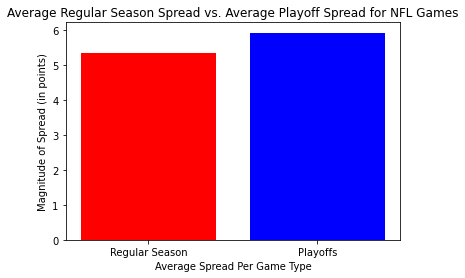

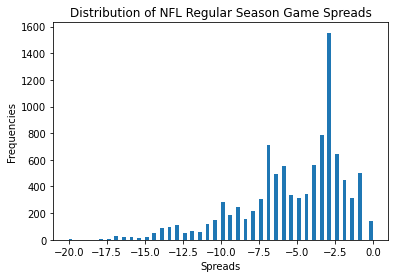

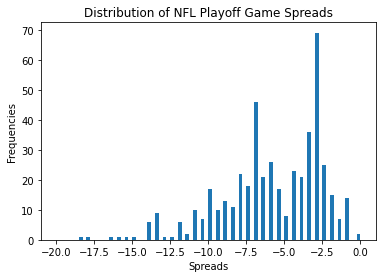

In [ ]:
if __name__ == '__main__':
  data = csv_lines('spreadspoke_scores.csv')
  reg_spreads, playoff_spreads = get_spreads(data)
  
  reg_null_count = count_null_spreads(reg_spreads)
  playoff_null_count = count_null_spreads(playoff_spreads)

  clean_reg_spreads = clean_spreads(reg_spreads, reg_null_count)
  clean_playoff_spreads = clean_spreads(playoff_spreads, playoff_null_count)
  
  clean_reg_spreads = convert_to_float(clean_reg_spreads)
  clean_playoff_spreads = convert_to_float(clean_playoff_spreads)
  
  avg_reg_spread = avg_spread(clean_reg_spreads)
  avg_playoff_spread = avg_spread(clean_playoff_spreads)

  print('AVG Regular Season Spread:', avg_reg_spread)
  print('AVG Playoff Spread', avg_playoff_spread)

  print(clean_reg_spreads)
  reg_std, len_regs = standard_deviation(clean_reg_spreads)
  playoff_std, len_playoff = standard_deviation(clean_playoff_spreads)

  t = t_statistic(avg_reg_spread, avg_playoff_spread, reg_std, playoff_std, len_regs, len_playoff)
  print('The t-statistic is', t)

  # Find degrees of freedom for t-test by using the lengths of the spreads
  df = len_regs + len_playoff - 2
  print("There are ", df, "degrees of freedom")
  
  plot_bar_chart(avg_reg_spread, avg_playoff_spread)
  
  plot_histograms(clean_reg_spreads, clean_playoff_spreads)